Car Sales in Mexico

## hola soy marcos 

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
import numpy as np
import seaborn as sns

# URL del archivo Excel
url_InegiCars = "https://www.inegi.org.mx/contenidos/datosprimarios/iavl/tabulados/8_Ventas_serie.xlsx"

# Leer el archivo Excel desde la URL, comenzando desde la 6ta fila ya que en la quinta están los títulos y la última fila solo es para saber dónde acaba el data set. 
df_CarsMex = pd.read_excel(url_InegiCars, header=5) 
ultima_fila = df_CarsMex.iloc[-5]

df_CarsMex = df_CarsMex[df_CarsMex['Año'] <= 2023]
# Prueba de funionamiento Mostrar las primeras 5 filas del DataFrame
print(df_CarsMex.head())
print(ultima_fila)

                            Tema     Año    Mes  Marca         Modelo  \
0  Venta al público de vehículos  2005.0  Enero  Acura            Mdx   
1  Venta al público de vehículos  2005.0  Enero  Acura             Rl   
2  Venta al público de vehículos  2005.0  Enero  Acura        Tl 3.5l   
3  Venta al público de vehículos  2005.0  Enero   Audi             A3   
4  Venta al público de vehículos  2005.0  Enero   Audi  A4 1.8 Cabrio   

               Tipo Segmento     Origen     País origen Cantidad  
0  Camiones ligeros    SUV's  Importado          Canadá       18  
1       Automóviles  De Lujo  Importado           Japón        4  
2       Automóviles  De Lujo  Importado  Estados Unidos       38  
3       Automóviles  De Lujo  Importado          Brasil       74  
4       Automóviles  De Lujo  Importado        Alemania        9  
Tema           Venta al publico de vehículos
Año                                   2024.0
Mes                                    Marzo
Marca                   

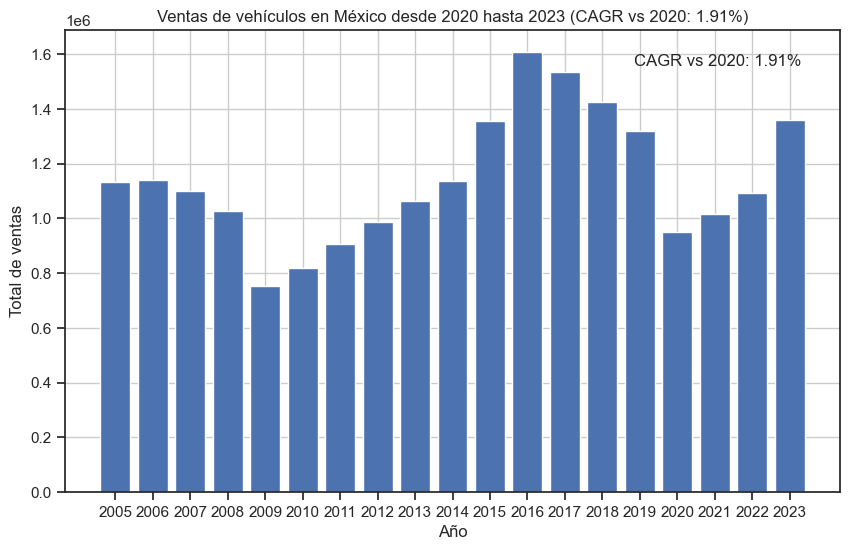

In [6]:

# Leer el archivo Excel desde la URL, comenzando desde la 6ta fila ya que en la quinta están los títulos y la última fila solo es para saber dónde acaba el data set.
df_CarsMex = pd.read_excel(url_InegiCars, header=5)

# Convertir la columna 'Cantidad' a tipo numérico
df_CarsMex['Cantidad'] = pd.to_numeric(df_CarsMex['Cantidad'], errors='coerce')

# Eliminar filas con valores NaN en la columna 'Cantidad'
df_CarsMex = df_CarsMex.dropna(subset=['Cantidad'])

# Convertir el año a tipo int para facilitar la visualización
df_CarsMex['Año'] = df_CarsMex['Año'].astype(int)

# Filtrar los datos hasta el año 2023
df_CarsMex = df_CarsMex[df_CarsMex['Año'] <= 2023]

# Agrupar los datos por año y calcular la cantidad total para cada año
growth_data = df_CarsMex.groupby('Año')['Cantidad'].sum().reset_index()

# Calcular el Compound Annual Growth Rate (CAGR) con respecto a 2020
initial_value = growth_data[growth_data['Año'] == 2020]['Cantidad'].iloc[0]
final_value = growth_data['Cantidad'].iloc[-1]
num_years = growth_data['Año'].iloc[-1] - growth_data['Año'].iloc[0] + 1
cagr = (final_value / initial_value) ** (1 / num_years) - 1

# Graficar la cantidad de ventas de vehículos a través del tiempo desde 2018 hasta 2023
plt.figure(figsize=(10, 6))
plt.bar(growth_data['Año'], growth_data['Cantidad'], color='b')
plt.title('Ventas de vehículos en México desde 2020 hasta 2023 (CAGR vs 2020: {:.2%})'.format(cagr))
plt.xlabel('Año')
plt.ylabel('Total de ventas')
plt.grid(True)
plt.xticks(growth_data['Año'])  # Asegurarse de que los ticks del eje x sean los años

# Agregar texto con el CAGR en la parte superior derecha del gráfico
plt.text(0.95, 0.95, 'CAGR vs 2020: {:.2%}'.format(cagr), transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right', fontsize=12)

plt.show()


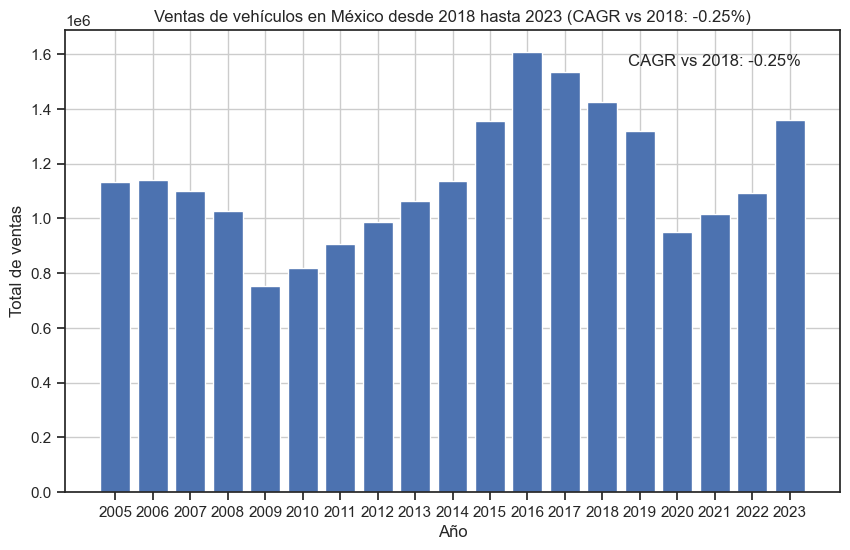

In [7]:
# Leer el archivo Excel desde la URL, comenzando desde la 6ta fila ya que en la quinta están los títulos y la última fila solo es para saber dónde acaba el data set.
df_CarsMex = pd.read_excel(url_InegiCars, header=5)

# Convertir la columna 'Cantidad' a tipo numérico
df_CarsMex['Cantidad'] = pd.to_numeric(df_CarsMex['Cantidad'], errors='coerce')

# Eliminar filas con valores NaN en la columna 'Cantidad'
df_CarsMex = df_CarsMex.dropna(subset=['Cantidad'])

# Convertir el año a tipo int para facilitar la visualización
df_CarsMex['Año'] = df_CarsMex['Año'].astype(int)

# Filtrar los datos hasta el año 2023
df_CarsMex = df_CarsMex[df_CarsMex['Año'] <= 2023]

# Agrupar los datos por año y calcular la cantidad total para cada año
growth_data = df_CarsMex.groupby('Año')['Cantidad'].sum().reset_index()

# Calcular el Compound Annual Growth Rate (CAGR) con respecto a 2020
initial_value = growth_data[growth_data['Año'] == 2018]['Cantidad'].iloc[0]
final_value = growth_data['Cantidad'].iloc[-1]
num_years = growth_data['Año'].iloc[-1] - growth_data['Año'].iloc[0] + 1
cagr = (final_value / initial_value) ** (1 / num_years) - 1

# Graficar la cantidad de ventas de vehículos a través del tiempo desde 2018 hasta 2023
plt.figure(figsize=(10, 6))
plt.bar(growth_data['Año'], growth_data['Cantidad'], color='b')
plt.title('Ventas de vehículos en México desde 2018 hasta 2023 (CAGR vs 2018: {:.2%})'.format(cagr))
plt.xlabel('Año')
plt.ylabel('Total de ventas')
plt.grid(True)
plt.xticks(growth_data['Año'])  # Asegurarse de que los ticks del eje x sean los años

# Agregar texto con el CAGR en la parte superior derecha del gráfico
plt.text(0.95, 0.95, 'CAGR vs 2018: {:.2%}'.format(cagr), transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right', fontsize=12)

plt.show()

In [8]:
# Group the data by year and calculate summary statistics for each year
statistics_by_year = df_CarsMex.groupby('Año')['Cantidad'].describe()
statistics_by_year['Total Count'] = df_CarsMex.groupby(['Año'])['Cantidad'].sum()

# Display the table of statistics
print(statistics_by_year)

       count        mean         std    min   25%   50%     75%      max  \
Año                                                                        
2005  3889.0  291.017742  638.771774   -9.0  13.0  65.0  269.00   9561.0   
2006  4054.0  281.138629  567.171393  -13.0  15.0  69.0  306.00   7431.0   
2007  4620.0  238.071429  496.322199  -14.0  14.0  53.0  245.25   6571.0   
2008  4916.0  208.613507  470.327392   -6.0  11.0  46.0  194.00   6755.0   
2009  4875.0  154.856410  376.134266  -47.0   7.0  31.0  140.00   6161.0   
2010  4612.0  177.886600  464.443696 -114.0   7.0  33.0  149.00   7250.0   
2011  4365.0  207.535624  533.015779  -14.0   8.0  39.0  174.00   5446.0   
2012  3967.0  249.065289  594.510180  -15.0  12.0  54.0  219.50   7982.0   
2013  4095.0  260.097192  625.560582   -1.0  11.0  54.0  230.00   8707.0   
2014  4130.0  275.294189  651.976833   -3.0  11.0  59.0  251.00   7744.0   
2015  4121.0  328.668770  778.136635   -1.0  14.0  73.0  293.00  10145.0   
2016  4134.0

In [9]:
# Obtain sales data
total_sales_by_country_w = df_CarsMex.groupby('País origen')['Cantidad'].sum()

# Calculate the percentage of total sales for each country
total_sales_percentage = total_sales_by_country_w / total_sales_by_country_w.sum()

# Print the percentage of total sales for each country
print(total_sales_percentage)


País origen
Alemania           0.024699
Argentina          0.013369
Austria            0.000465
Brasil             0.084477
Bélgica            0.002163
Canadá             0.020386
Chile              0.000237
China              0.035194
Colombia           0.007578
Corea del Sur      0.036971
Eslovaquia         0.002399
España             0.023187
Estados Unidos     0.132119
Finlandia          0.000000
Francia            0.005954
Hungría            0.003585
India              0.065852
Indonesia          0.008458
Italia             0.001105
Japón              0.079667
México             0.405347
No Especificado    0.000391
Países Bajos       0.000065
Polonia            0.000869
Portugal           0.000144
Reino Unido        0.007003
República Checa    0.003675
Serbia             0.000040
Suecia             0.001005
Tailandia          0.031615
Taiwán             0.000119
Turquía            0.001860
Name: Cantidad, dtype: float64


                  Total Count
País origen Año              
Brasil      2005     219941.0
            2006     180652.0
            2007     137302.0
            2008     107568.0
            2009      67905.0
...                       ...
Other       2019     223333.0
            2020     158073.0
            2021     190837.0
            2022     200249.0
            2023     227787.0

[143 rows x 1 columns]


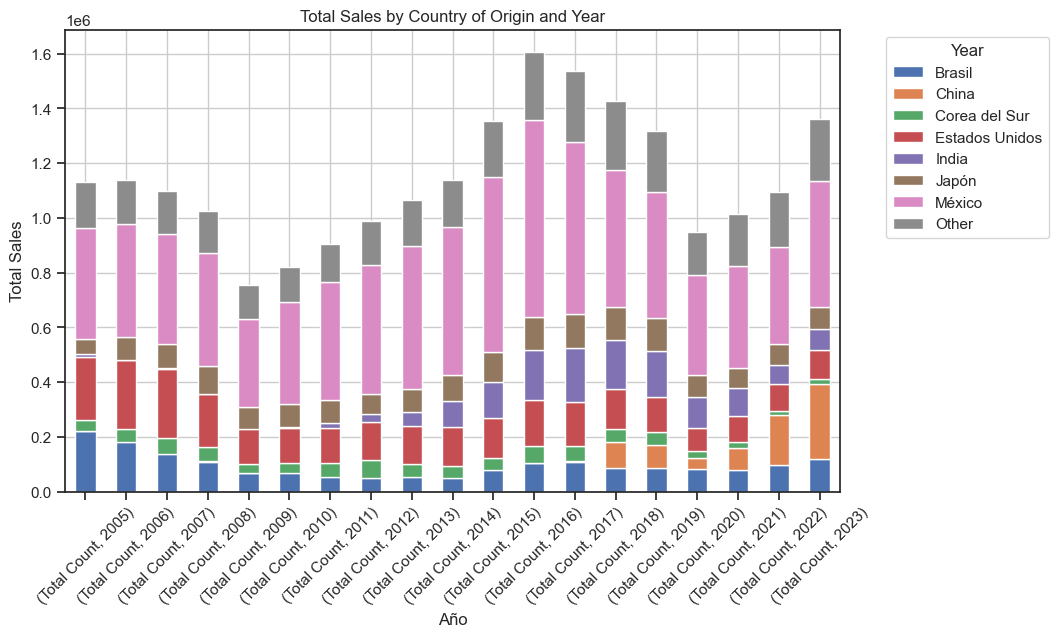

In [10]:
total_sales_by_country = df_CarsMex.groupby('País origen')['Cantidad'].sum()

# Calculate the percentage of total sales for each country
total_sales_percentage = total_sales_by_country / total_sales_by_country.sum()

# Identify the countries with total sales less than 5% of the total market
other_countries = total_sales_percentage[total_sales_percentage < 0.0335].index

# Replace the country names with 'Other' for those countries
df_CarsMex['País origen'] = df_CarsMex['País origen'].apply(lambda x: 'Other' if x in other_countries else x)

# Create an empty DataFrame to store the sum total count for each group (country and year)
sum_country_year = pd.DataFrame()

# Calculate the sum total count for each group and add it as a new column
sum_country_year['Total Count'] = df_CarsMex.groupby(['País origen', 'Año'])['Cantidad'].sum()

# Display the updated table of statistics
print(sum_country_year)
stacked_data = sum_country_year.unstack(level='Año')
# Transpose the DataFrame
stacked_data_transposed = stacked_data.T

# Plot the stacked bar chart
stacked_data_transposed.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Sales by Country of Origin and Year')
plt.xlabel('Año')
plt.ylabel('Total Sales')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

        País origen   Año  Crecimiento de Cantidad
13           Brasil  2018                      NaN
14           Brasil  2019                -1.564228
15           Brasil  2020                -2.973164
16           Brasil  2021                -3.953588
17           Brasil  2022                23.135720
18           Brasil  2023                21.854151
24            China  2018                      NaN
25            China  2019                -9.848477
26            China  2020               -53.567041
27            China  2021               103.016891
28            China  2022               128.358602
29            China  2023                50.116596
43    Corea del Sur  2018                      NaN
44    Corea del Sur  2019                 0.711469
45    Corea del Sur  2020               -46.350753
46    Corea del Sur  2021               -12.406298
47    Corea del Sur  2022               -42.839031
48    Corea del Sur  2023                26.623891
62   Estados Unidos  2018      

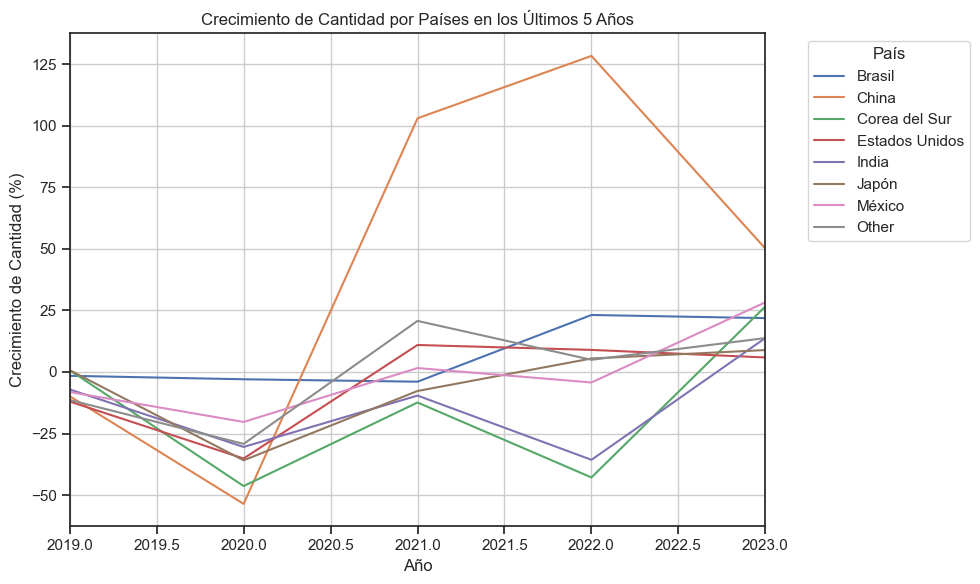

In [11]:
# Filtrar los datos para incluir solo los últimos 5 años
last_5_years_data = sum_country_year.reset_index().loc[sum_country_year.reset_index()['Año'] >= 2018]

# Calcular el porcentaje de crecimiento de cantidad para cada país en los últimos 5 años
country_growth_last_5_years = last_5_years_data.groupby('País origen')['Total Count'].pct_change() * 100

# Crear un DataFrame con el crecimiento de cantidad por países en los últimos 5 años
country_growth_df = pd.DataFrame({
    'País origen': last_5_years_data['País origen'],
    'Año': last_5_years_data['Año'],
    'Crecimiento de Cantidad': country_growth_last_5_years
})

# Imprimir el DataFrame
print(country_growth_df)
# Obtener una lista de países únicos para asignar un color a cada uno
unique_countries = country_growth_df['País origen'].unique()

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar el crecimiento de cantidad por países en los últimos 5 años
for i, country in enumerate(unique_countries):
    country_data = country_growth_df[country_growth_df['País origen'] == country]
    plt.plot(country_data['Año'], country_data['Crecimiento de Cantidad'], label=country)

# Agregar título y etiquetas de los ejes
plt.title('Crecimiento de Cantidad por Países en los Últimos 5 Años')
plt.xlabel('Año')
plt.ylabel('Crecimiento de Cantidad (%)')

# Mostrar la leyenda con los países y ajustar la posición
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar los límites del eje x para que se muestren correctamente los años
plt.xlim(2019, country_growth_df['Año'].max())

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()


# 


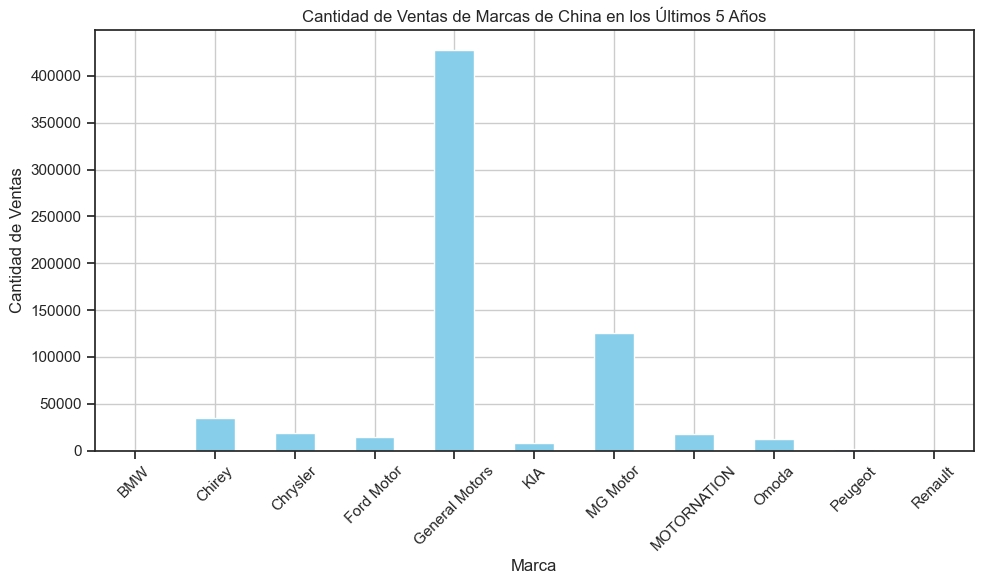

In [12]:
# Filtrar los datos para incluir solo las marcas de China y los últimos 5 años
china_brands_data_last_5_years = df_CarsMex[(df_CarsMex['País origen'] == 'China') & (df_CarsMex['Año'] >= 2019)]

# Calcular la cantidad de ventas por marca
china_brands_sales_last_5_years = china_brands_data_last_5_years.groupby('Marca')['Cantidad'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
china_brands_sales_last_5_years.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Ventas de Marcas de China en los Últimos 5 Años')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

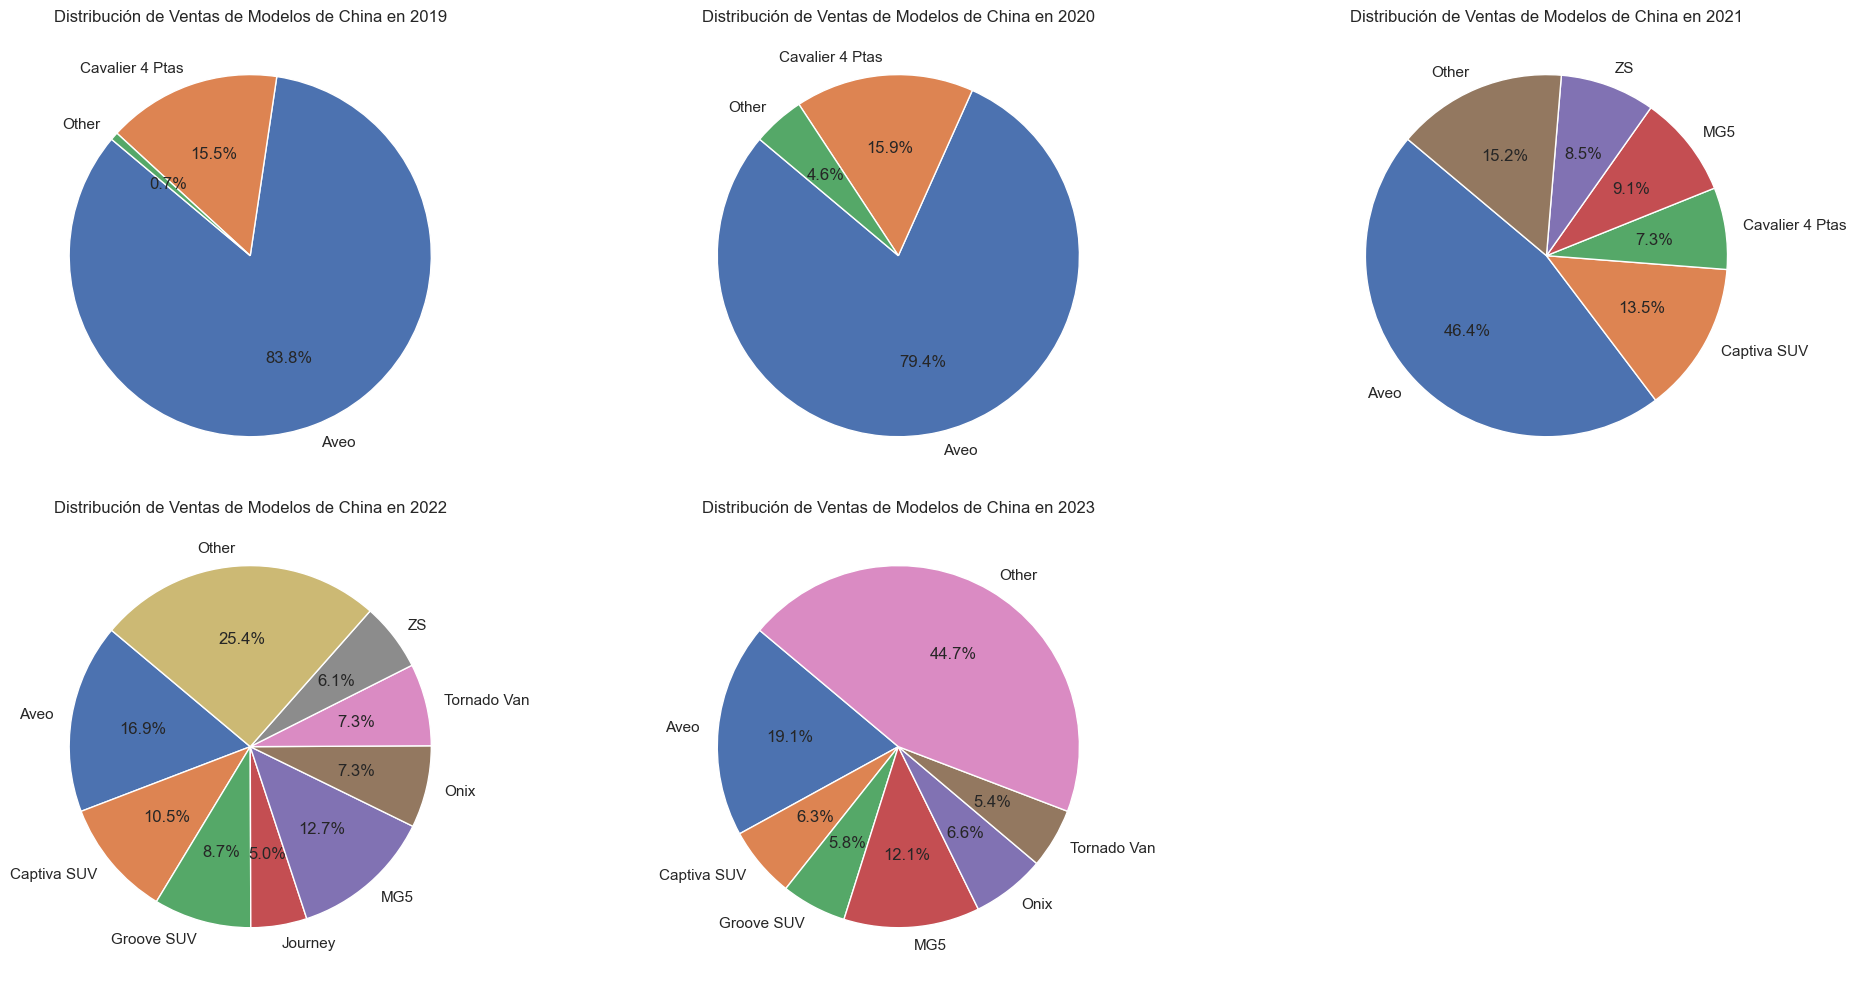

In [13]:
# Crear una lista para almacenar las gráficas de pastel
plt.figure(figsize=(20, 10))

# Iterar sobre los años
for i, year in enumerate(range(2019, 2024)):
    # Filtrar los datos para el año actual
    year_data = df_CarsMex[df_CarsMex['Año'] == year]
    
    # Filtrar los datos para incluir solo los modelos de China
    china_models_data = year_data[year_data['País origen'] == 'China']
    
    # Calcular la cantidad total de ventas para el año actual
    total_sales = china_models_data['Cantidad'].sum()
    
    # Calcular el porcentaje de ventas para cada modelo
    model_sales_percentage = (china_models_data.groupby('Modelo')['Cantidad'].sum() / total_sales) * 100
    
    # Filtrar los modelos que representan menos del 5% de las ventas y agruparlos en 'Other'
    other_models_percentage = model_sales_percentage[model_sales_percentage < 5].sum()
    model_sales_percentage = model_sales_percentage[model_sales_percentage >= 5]
    model_sales_percentage['Other'] = other_models_percentage
    
    # Crear la gráfica de pastel para el año actual
    plt.subplot(2, 3, i+1)
    plt.pie(model_sales_percentage, labels=model_sales_percentage.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribución de Ventas de Modelos de China en {year}')
    
plt.tight_layout()
plt.show()

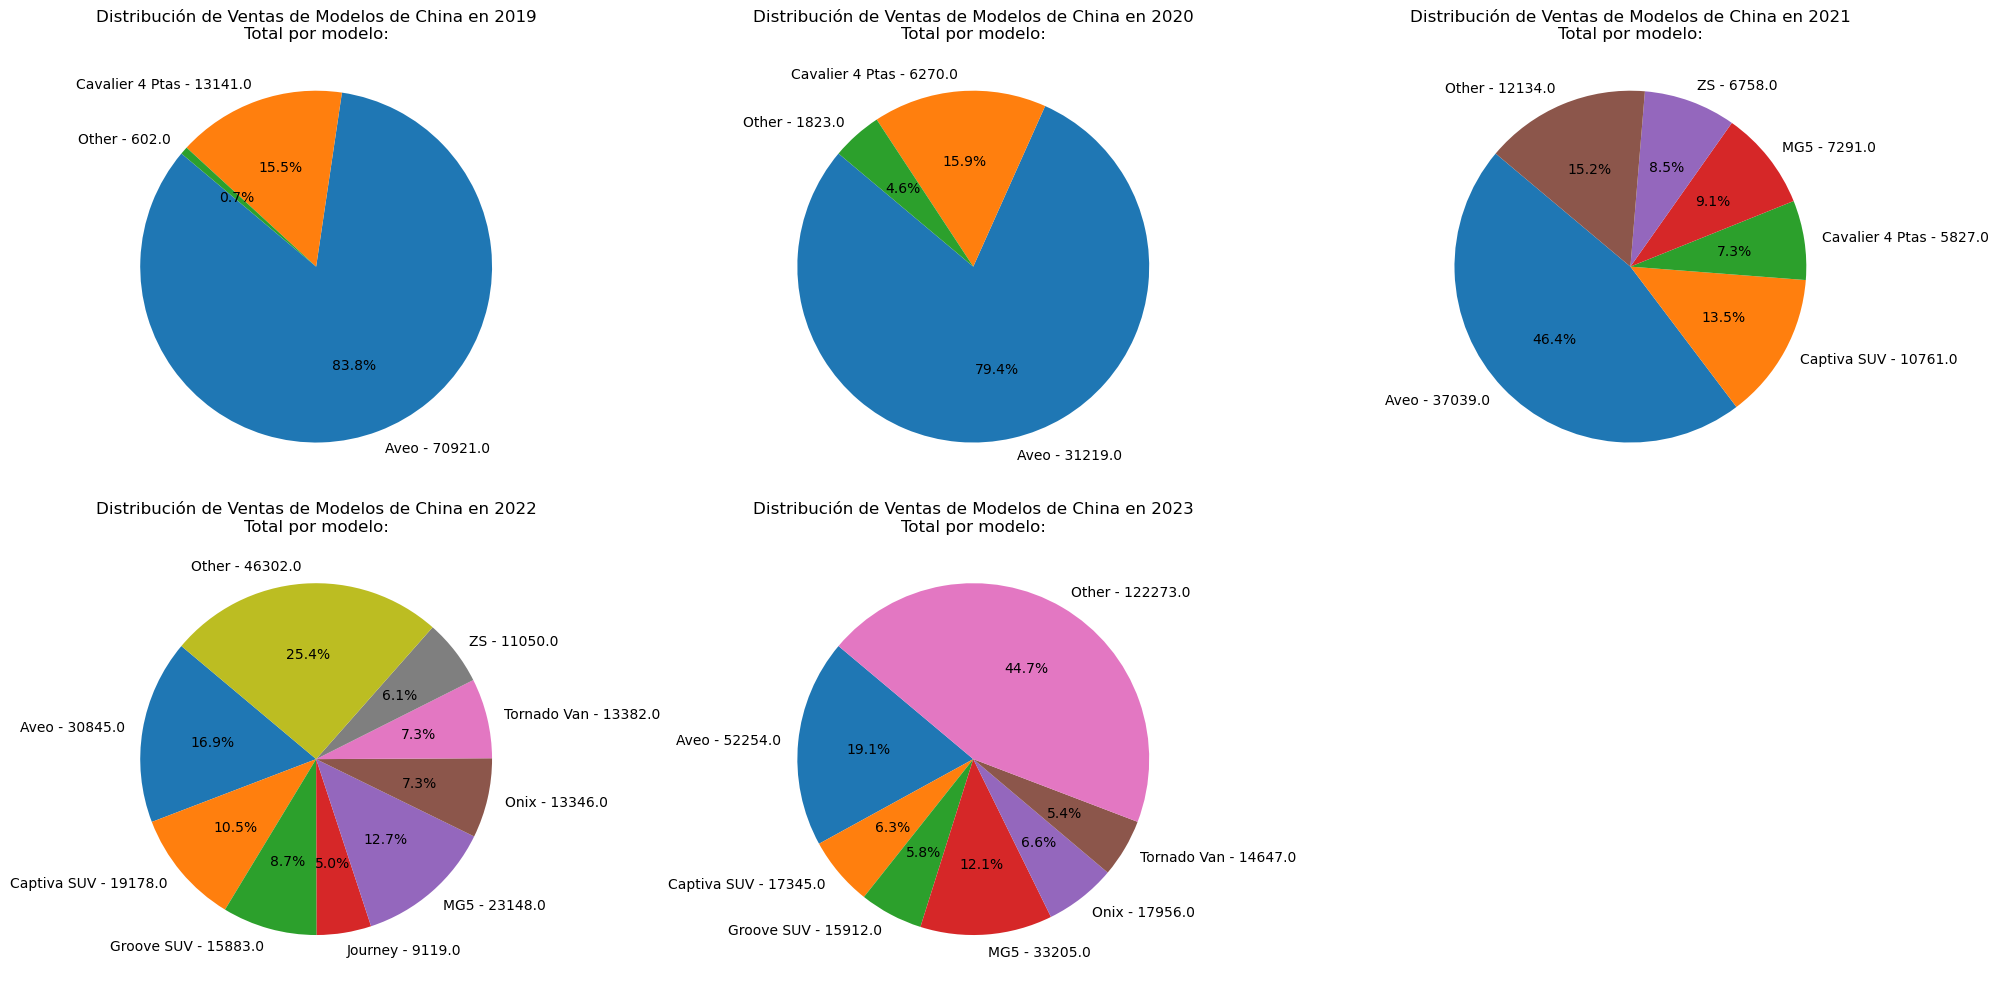

In [68]:

# Crear una lista para almacenar las gráficas de pastel
plt.figure(figsize=(20, 10))

# Iterar sobre los años
for i, year in enumerate(range(2019, 2024)):
    # Filtrar los datos para el año actual
    year_data = df_CarsMex[df_CarsMex['Año'] == year]
    
    # Filtrar los datos para incluir solo los modelos de China
    china_models_data = year_data[year_data['País origen'] == 'China']
    
    # Calcular las ventas de cada modelo
    model_sales = china_models_data.groupby('Modelo')['Cantidad'].sum()
    
    # Filtrar los modelos que representan menos del 5% de las ventas y agruparlos en 'Other'
    total_sales = model_sales.sum()
    other_models_sales = model_sales[model_sales < 0.05 * total_sales].sum()
    model_sales = model_sales[model_sales >= 0.05 * total_sales]
    model_sales['Other'] = other_models_sales
    
    # Crear la gráfica de pastel para el año actual
    
    labels = [f"{model} - {sales}" for model, sales in zip(model_sales.index, model_sales)]
    plt.subplot(2, 3, i+1)
    plt.pie(model_sales, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribución de Ventas de Modelos de China en {year}\nTotal por modelo:')
    
plt.tight_layout()
plt.show()

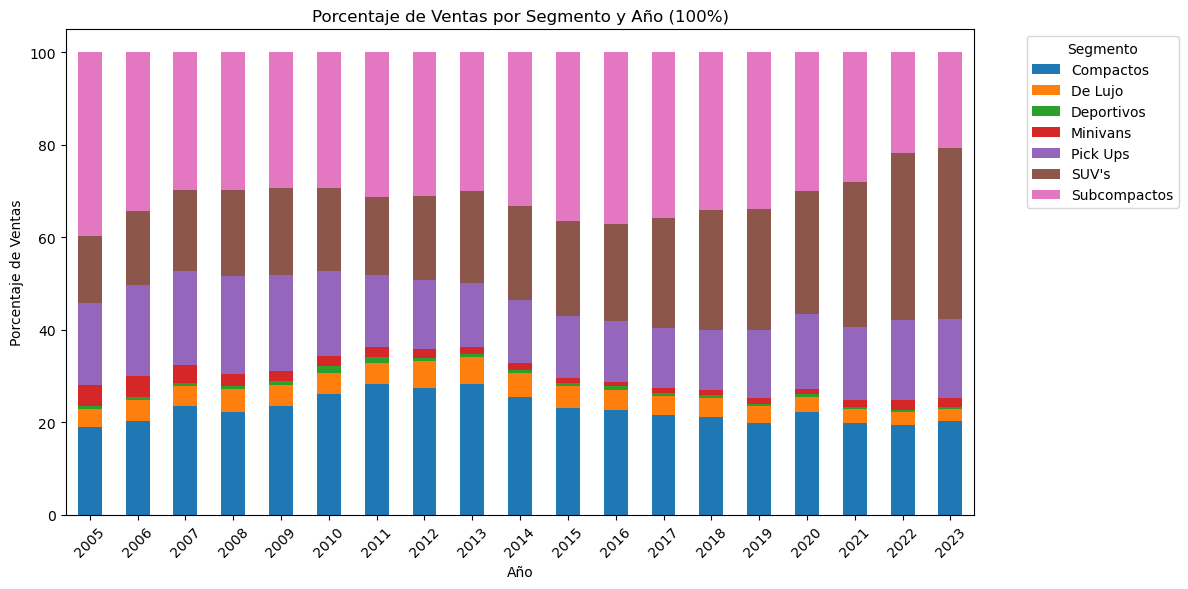

In [70]:

# Calcular el total de ventas por año
ventas_por_ano = df_CarsMex.groupby('Año')['Cantidad'].sum()

# Agrupar por año y segmento, y sumar las ventas
ventas_por_segmento_ano = df_CarsMex.groupby(['Año', 'Segmento'])['Cantidad'].sum().unstack()

# Calcular el porcentaje de ventas de cada segmento por año
porcentaje_ventas = ventas_por_segmento_ano.div(ventas_por_ano, axis=0) * 100

# Graficar la gráfica de barras de 100%
porcentaje_ventas.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Porcentaje de Ventas por Segmento y Año (100%)')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

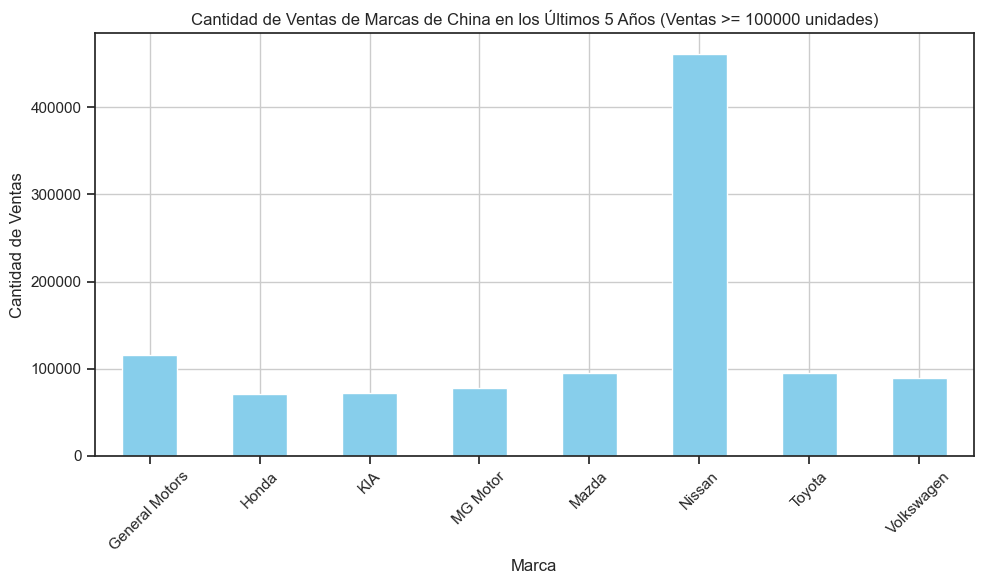

In [14]:
# Filtrar los datos para incluir solo las marcas de China y los últimos 5 años
Compact_brands_data_last_5_years = df_CarsMex[(df_CarsMex['Segmento'] == 'Compactos') & (df_CarsMex['Año'] >= 2019)]

# Calcular la cantidad de ventas por marca
Compact_brands_data_last_5_years = Compact_brands_data_last_5_years.groupby('Marca')['Cantidad'].sum()

# Filtrar las marcas con una cantidad menor a 5000 unidades
Compact_brands_data_last_5_years_filtered = Compact_brands_data_last_5_years[Compact_brands_data_last_5_years >= 50000]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
Compact_brands_data_last_5_years_filtered.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Ventas de Marcas de China en los Últimos 5 Años (Ventas >= 100000 unidades)')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

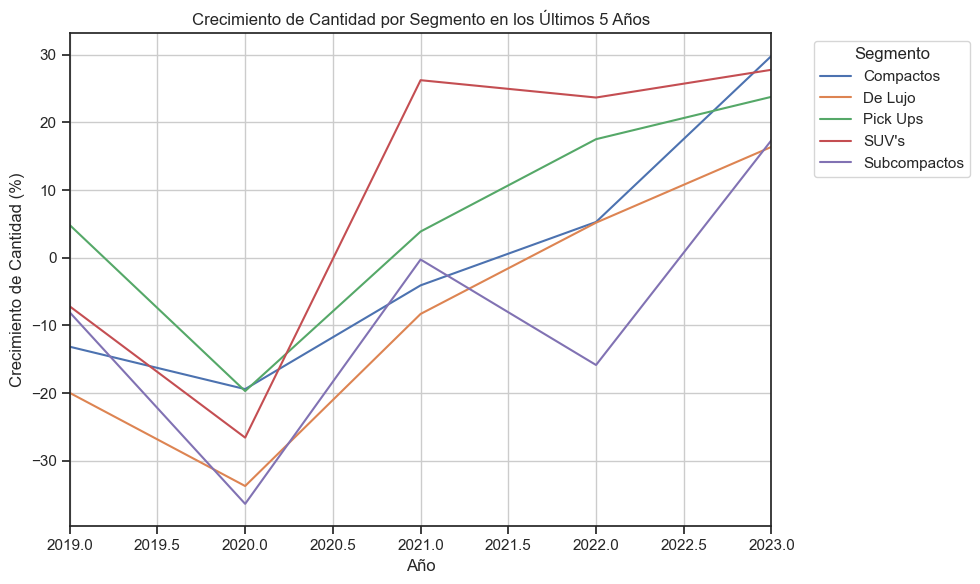

In [15]:
# Calcular las ventas totales por segmento
total_sales_by_segment = df_CarsMex.groupby('Segmento')['Cantidad'].sum()

# Calcular el porcentaje de ventas totales para cada segmento
total_sales_segment_percentage = total_sales_by_segment / total_sales_by_segment.sum()

# Identificar los segmentos con ventas totales menos del 3.35% del mercado total
other_segments = total_sales_segment_percentage[total_sales_segment_percentage < 0.0335].index

# Reemplazar los nombres de los segmentos con 'Other' para aquellos con ventas totales menos del 3.35%
df_CarsMex['Segmento'] = df_CarsMex['Segmento'].apply(lambda x: 'Other' if x in other_segments else x)

# Crear un DataFrame vacío para almacenar la suma total de ventas para cada grupo (segmento y año)
sum_segment_year = pd.DataFrame()

# Calcular la suma total de ventas para cada grupo y agregarla como una nueva columna
sum_segment_year['Total Count'] = df_CarsMex.groupby(['Segmento', 'Año'])['Cantidad'].sum()

# Filtrar los datos para incluir solo los últimos 5 años
last_5_years_data_segment = sum_segment_year.reset_index().loc[sum_segment_year.reset_index()['Año'] >= 2018]

# Calcular el porcentaje de crecimiento de cantidad para cada segmento en los últimos 5 años
segment_growth_last_5_years = last_5_years_data_segment.groupby('Segmento')['Total Count'].pct_change() * 100

# Crear un DataFrame con el crecimiento de cantidad por segmento en los últimos 5 años
segment_growth_df = pd.DataFrame({
    'Segmento': last_5_years_data_segment['Segmento'],
    'Año': last_5_years_data_segment['Año'],
    'Crecimiento de Cantidad': segment_growth_last_5_years
})

# Obtener una lista de segmentos únicos para asignar un color a cada uno
unique_segments = segment_growth_df['Segmento'].unique()

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))


# Graficar el crecimiento de cantidad por segmento en los últimos 5 años
for segment in unique_segments:
    if segment != 'Other':  # Exclude 'Other' category
        segment_data = segment_growth_df[segment_growth_df['Segmento'] == segment]
        plt.plot(segment_data['Año'], segment_data['Crecimiento de Cantidad'], label=segment)



# Agregar título y etiquetas de los ejes
plt.title('Crecimiento de Cantidad por Segmento en los Últimos 5 Años')
plt.xlabel('Año')
plt.ylabel('Crecimiento de Cantidad (%)')

# Mostrar la leyenda con los segmentos y ajustar la posición
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar los límites del eje x para que se muestren correctamente los años
plt.xlim(2019, segment_growth_df['Año'].max())

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()

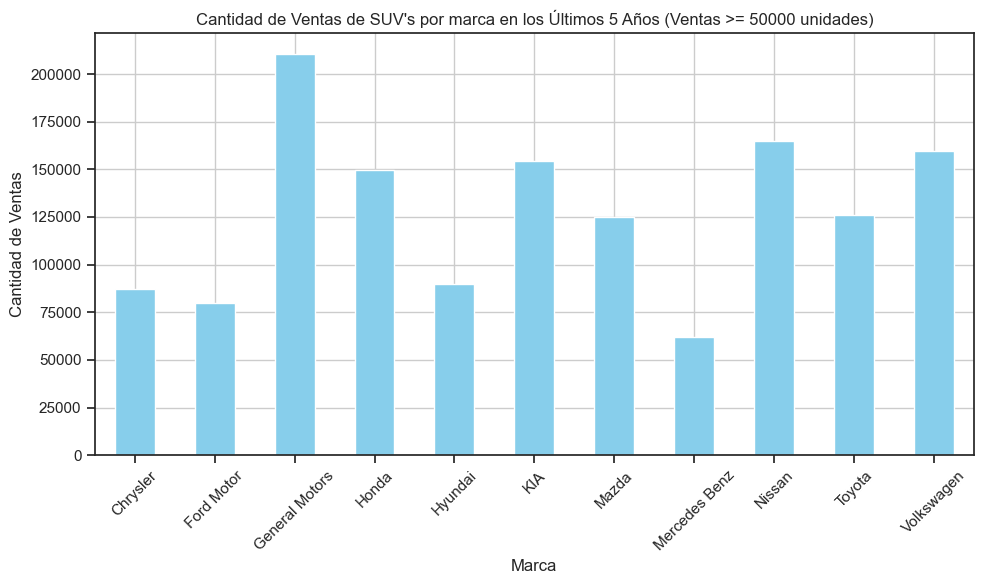

In [16]:
# Filtrar los datos para incluir solo las marcas de China y los últimos 5 años
SUV_brands_data_last_5_years = df_CarsMex[(df_CarsMex['Segmento'] == "SUV's") & (df_CarsMex['Año'] >= 2019)]

# Calcular la cantidad de ventas por marca
SUV_brands_data_last_5_years = SUV_brands_data_last_5_years.groupby('Marca')['Cantidad'].sum()

# Filtrar las marcas con una cantidad menor a 5000 unidades
SUV_brands_data_last_5_years_filtered = SUV_brands_data_last_5_years[SUV_brands_data_last_5_years >= 50000]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
SUV_brands_data_last_5_years_filtered.plot(kind='bar', color='skyblue')
plt.title("Cantidad de Ventas de SUV's por marca en los Últimos 5 Años (Ventas >= 50000 unidades)")
plt.xlabel('Marca')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\jrobe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


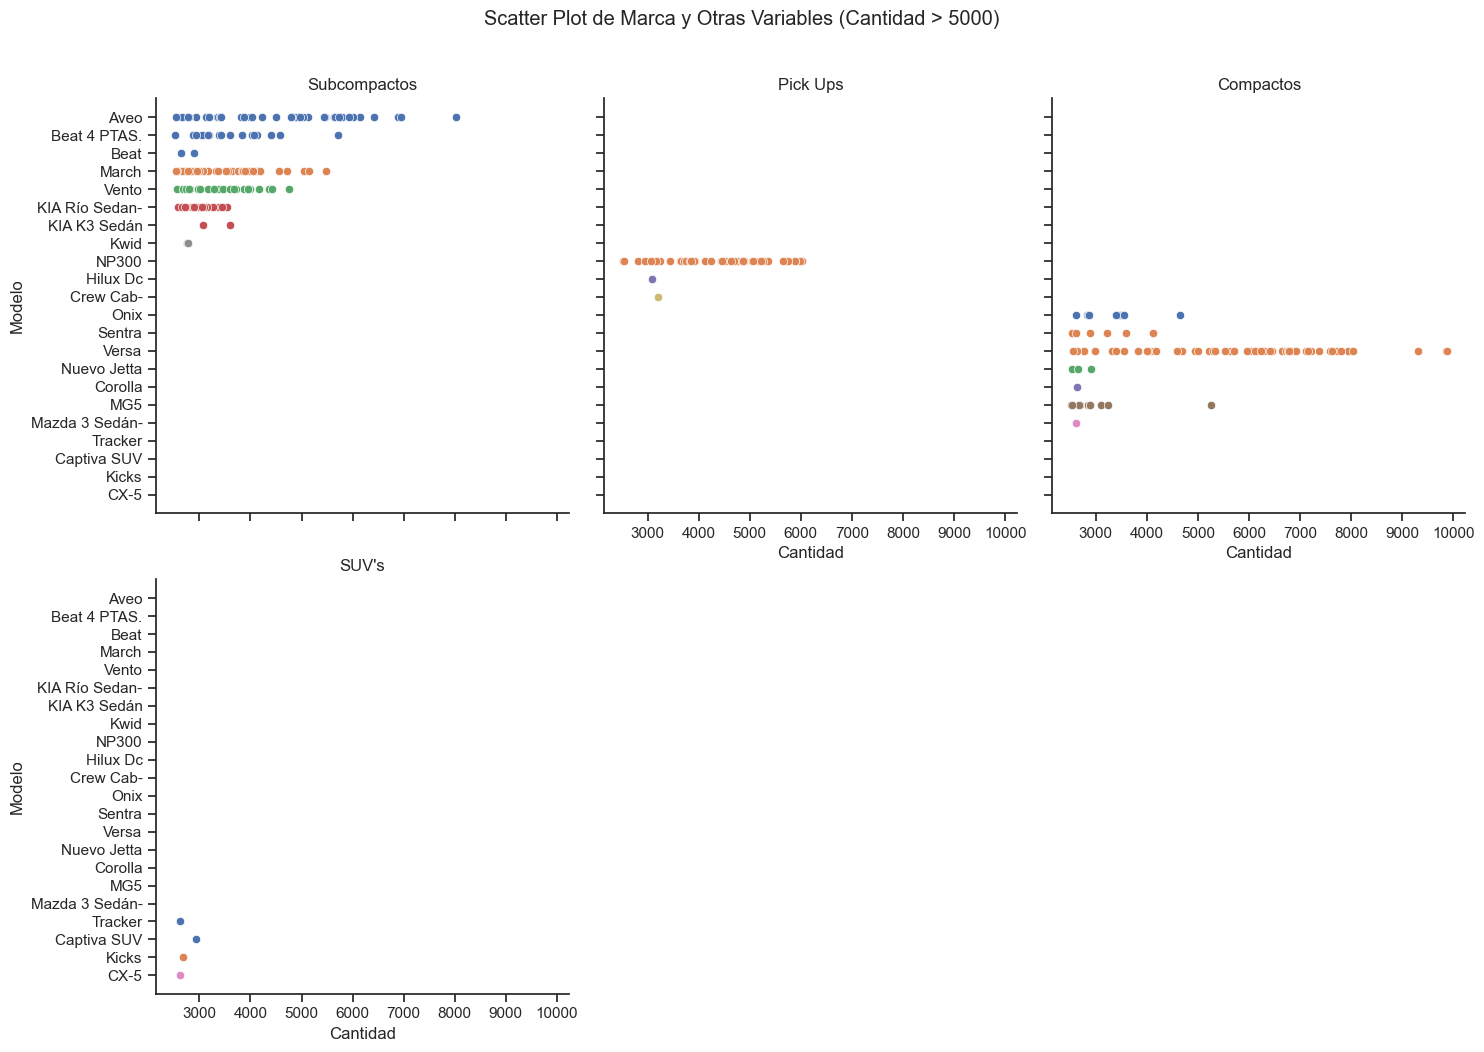

In [27]:
import seaborn as sns
# Filtrar los datos para incluir solo los últimos 5 años y donde la cantidad es mayor a 5000 unidades
last_5_years_data = df_CarsMex[(df_CarsMex['Año'] >= 2019) & (df_CarsMex['Cantidad'] > 2500)]

# Configurar el estilo de Seaborn
sns.set_theme(style="ticks")

# Crear subgráficos para cada segmento
g = sns.FacetGrid(last_5_years_data, col="Segmento", hue="Marca", col_wrap=3, height=5)
g.map(sns.scatterplot, "Cantidad", "Modelo")
g.set_titles("{col_name}")
plt.suptitle('Scatter Plot de Marca y Otras Variables (Cantidad > 5000)', y= 1.05)
plt.show()